In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'C:\Users\91964\Desktop\nazia\datascience\Projects_DT\happiness_score_dataset.csv')

In [3]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [4]:
df.shape

(158, 12)

In [5]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [6]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [7]:
df.isna().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [9]:
df.isna().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.shape

(158, 12)

#relation between features and label

In [12]:
x=df.drop(columns=['Happiness Score'],axis=1)
y=df['Happiness Score']

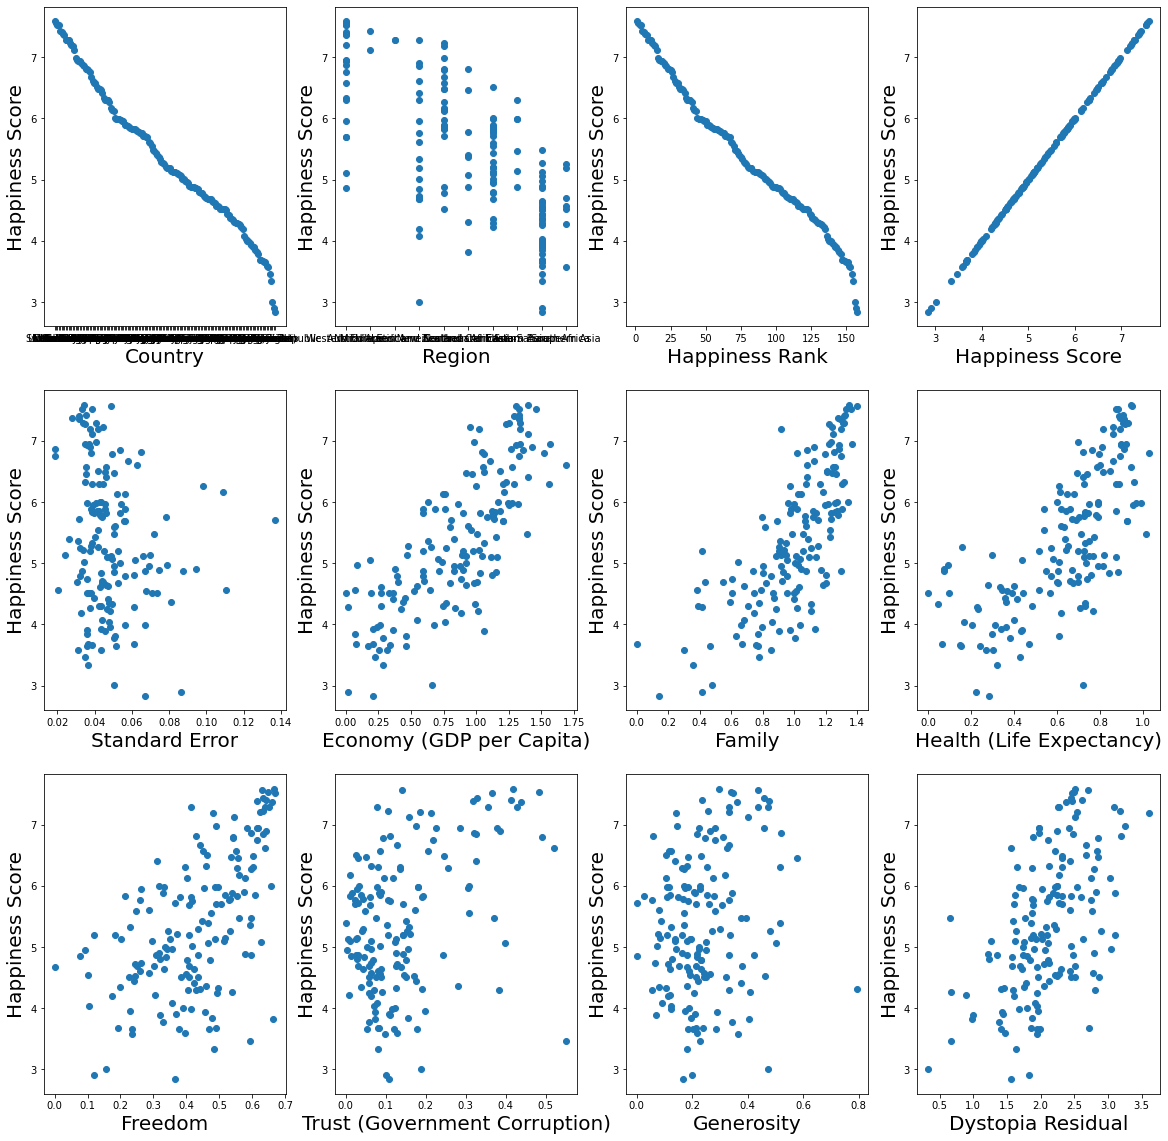

In [13]:
plt.figure(figsize=(20,20))
plotnumber=1

for column in df:
    if plotnumber<=12:
        ax=plt.subplot(3,4,plotnumber)
        plt.scatter(df[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Happiness Score',fontsize=20)
    plotnumber+=1
plt.show()

#by dropping 2 columns

In [14]:
df=df.drop(columns=['Region','Happiness Rank'])

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
LE=LabelEncoder()

In [17]:
df['Country']=LE.fit_transform(df['Country'])

In [18]:
df.head()

,Country,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


#Checking distribution

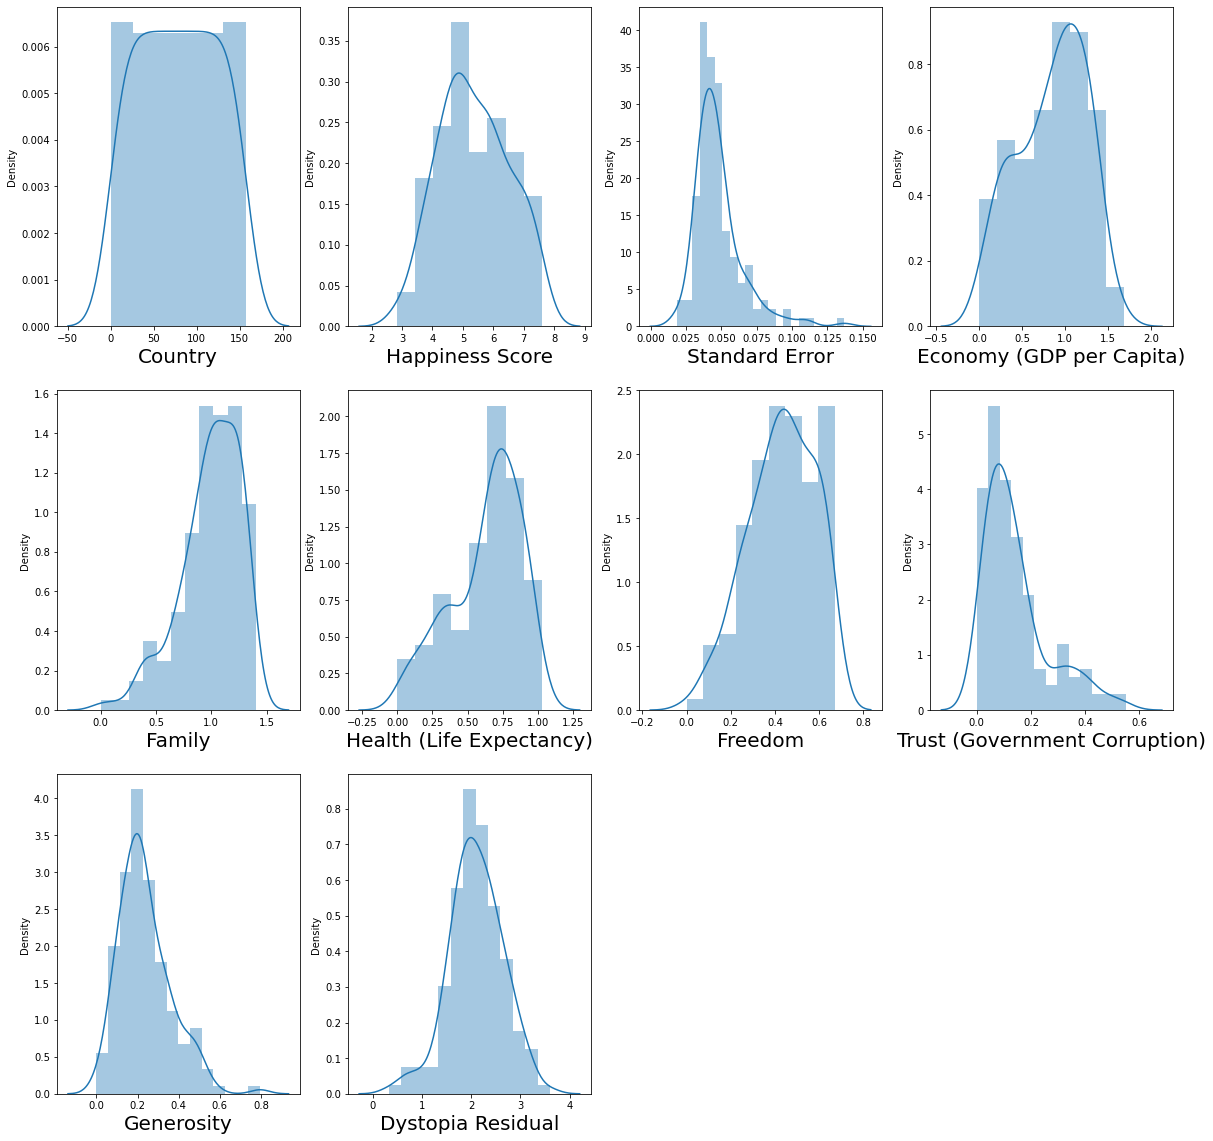

In [19]:
plt.figure(figsize=(20,20))
plotnumber=1

for column in df:
    if plotnumber<=12:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [20]:
from sklearn.preprocessing import power_transform
df1=power_transform(df)

In [21]:
type(df1)

numpy.ndarray

In [22]:
df1=pd.DataFrame(df1,columns=df.columns)

In [23]:
df1

,Country,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.171069,1.857034,-0.972226,1.446061,1.669206,1.491765,1.756335,1.773991,0.622391,0.750992
1,-0.344327,1.836668,0.309350,1.173321,2.012132,1.532348,1.439946,0.315993,1.480995,1.110011
2,-0.845092,1.810002,-1.062017,1.239836,1.739586,1.085223,1.615733,1.906792,0.927973,0.702275
3,0.620972,1.806077,-0.503610,1.630246,1.553118,1.147600,1.792821,1.624007,0.964080,0.651035
4,-1.195601,1.731344,-0.823548,1.242168,1.501726,1.270179,1.475479,1.503484,1.592224,0.625118
...,...,...,...,...,...,...,...,...,...,...
153,0.864172,-1.741699,-0.916014,-1.494046,-0.959885,-0.939459,1.135229,2.012856,0.065304,-2.393259
154,-1.536462,-1.866654,-0.719479,-1.360829,-1.896644,-1.276496,0.307514,-0.433835,-0.334169,-0.863565
155,1.188769,-2.207180,0.399137,-0.513469,-1.690664,0.262933,-1.668658,0.738915,1.659336,-2.866216
156,-1.283328,-2.312177,1.926902,-1.894954,-1.796803,-1.525700,-1.849903,-0.151946,-0.194829,-0.514801


In [24]:
df1.shape

(158, 10)

In [25]:
df1.skew().sort_values(ascending=False)

Trust (Government Corruption)    0.185965
Dystopia Residual                0.022925
Generosity                       0.013320
Standard Error                  -0.020092
Happiness Score                 -0.027956
Freedom                         -0.080728
Economy (GDP per Capita)        -0.127233
Family                          -0.169651
Health (Life Expectancy)        -0.183181
Country                         -0.279791
dtype: float64

In [26]:
x=df1.drop(columns=['Happiness Score'],axis=1)
y=df1['Happiness Score']

In [27]:
x.shape

(158, 9)

In [28]:
y.shape

(158,)

In [29]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled.shape[1]

9

In [30]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaled,i) for i in range (x_scaled.shape[1])]
vif['features']=x.columns
vif

,vif,features
0,1.042963,Country
1,1.146222,Standard Error
2,4.494663,Economy (GDP per Capita)
3,2.227279,Family
4,3.776338,Health (Life Expectancy)
5,2.006860,Freedom
6,1.389731,Trust (Government Corruption)
7,1.356420,Generosity
8,1.059188,Dystopia Residual


In [31]:
x.shape,y.shape

((158, 9), (158,))

In [32]:
corr=df1.corr()
corr.shape

(10, 10)

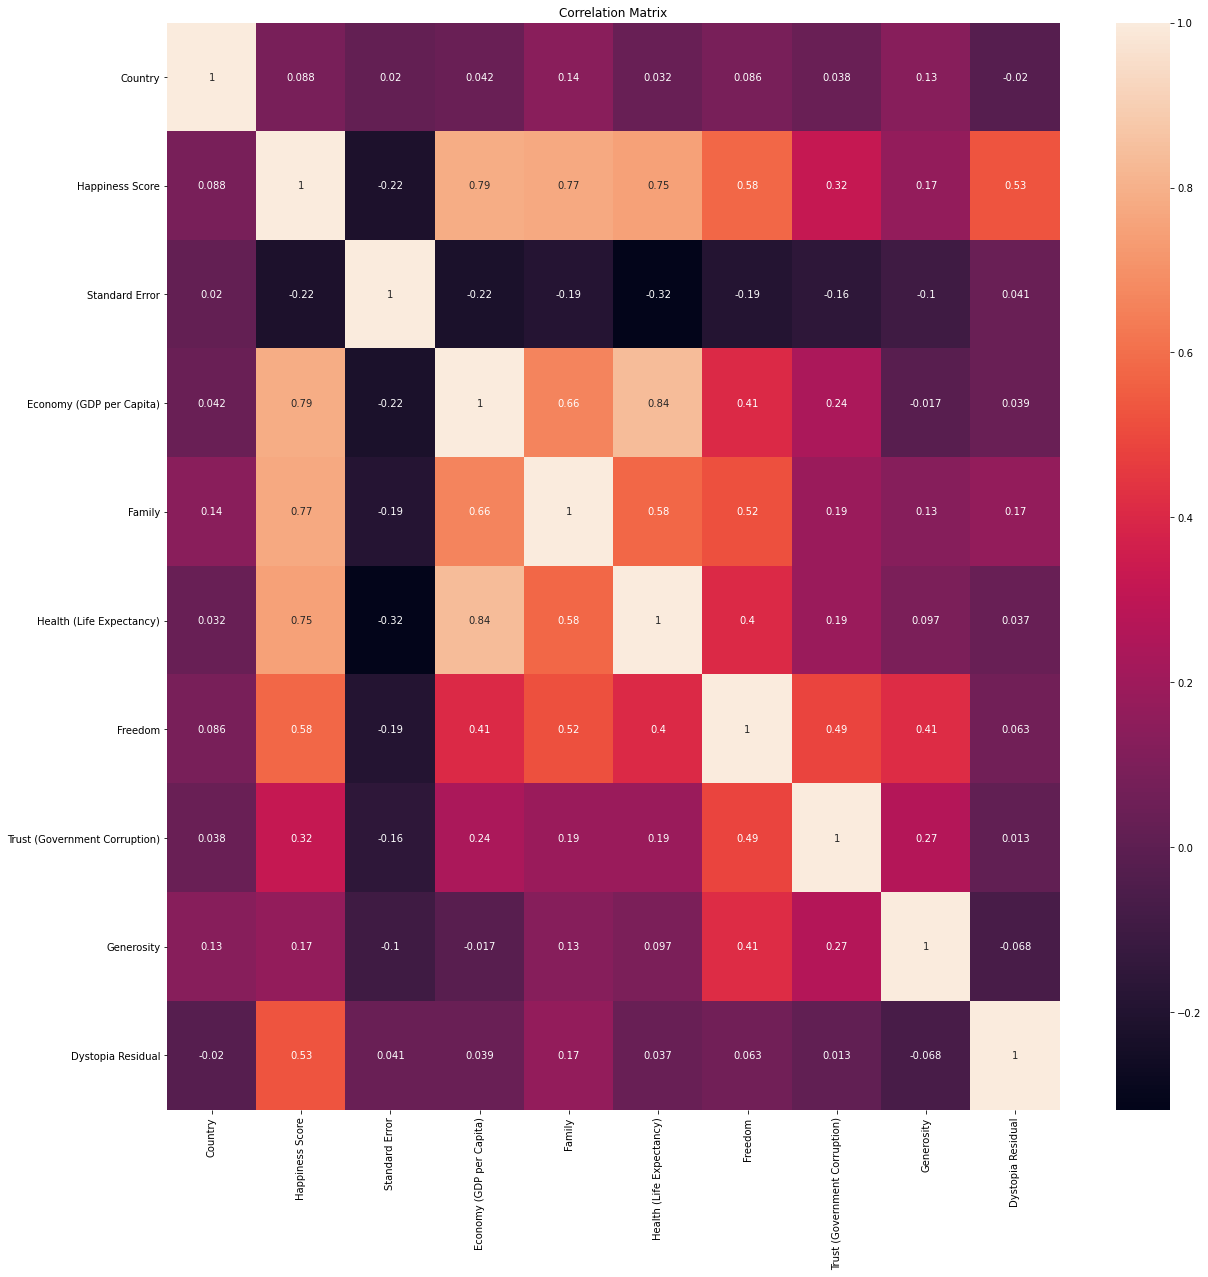

In [33]:
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True)
plt.title('Correlation Matrix')
plt.show()

In [34]:
corr['Happiness Score'].sort_values(ascending=False)

Happiness Score                  1.000000
Economy (GDP per Capita)         0.786521
Family                           0.774335
Health (Life Expectancy)         0.749567
Freedom                          0.578866
Dystopia Residual                0.529776
Trust (Government Corruption)    0.324429
Generosity                       0.169047
Country                          0.088269
Standard Error                  -0.216733
Name: Happiness Score, dtype: float64

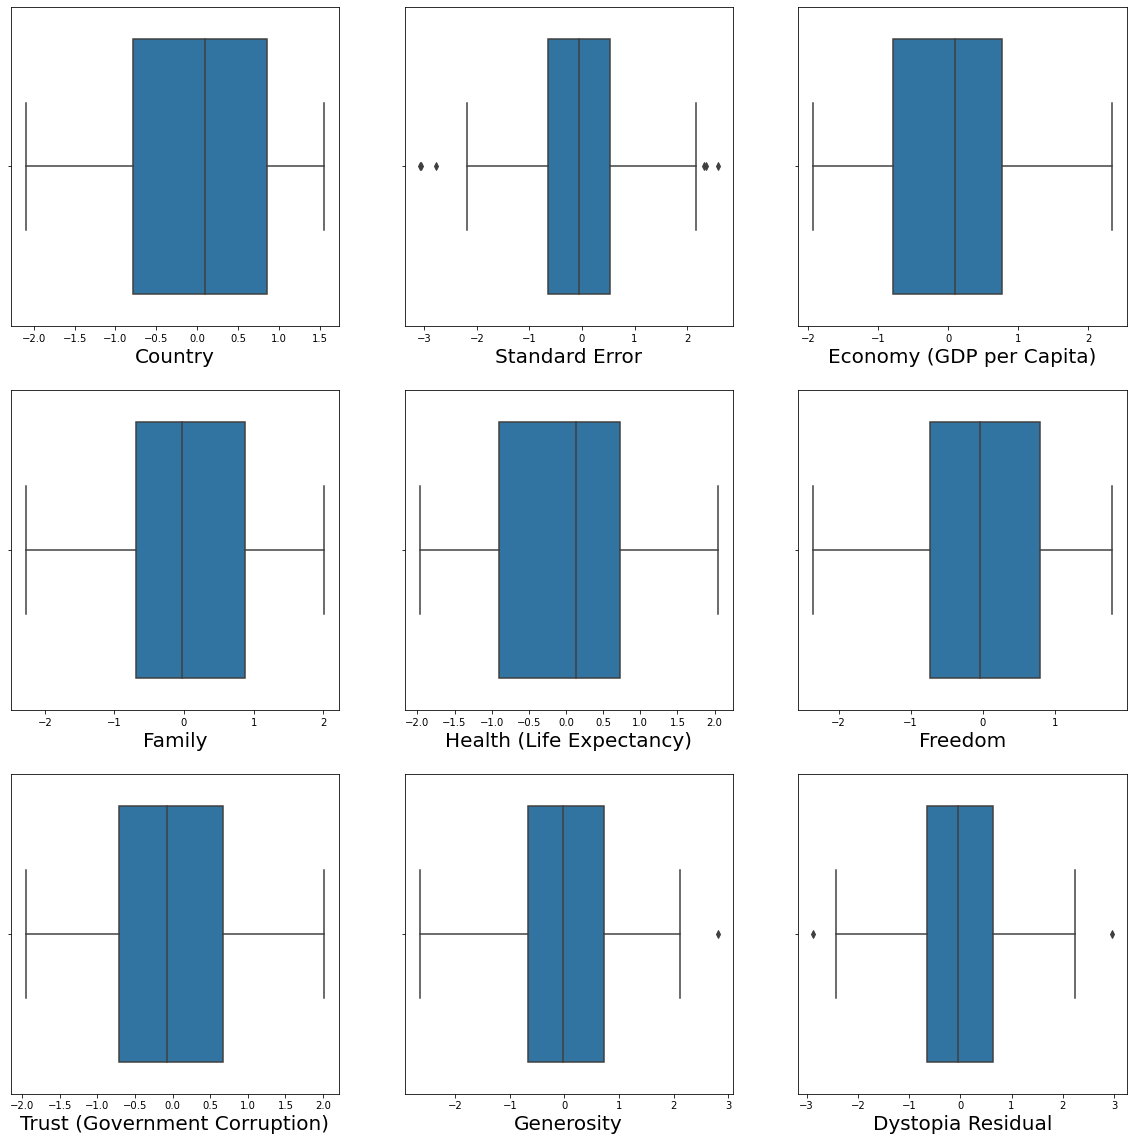

In [35]:
plt.figure(figsize=(20,20))
plotnumber=1

for column in x:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(x[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [36]:
from scipy.stats import zscore

In [37]:
(np.abs(zscore(x))<3).all()

False

In [38]:
x.shape

(158, 9)

In [39]:
z_score=zscore(df[['Generosity','Dystopia Residual','Standard Error']])

In [40]:
abs_z_score=np.abs(z_score)
filtering_entry=(abs_z_score<3).all(axis=1)
df1=df1[filtering_entry]

In [41]:
df1.shape

(153, 10)

In [42]:
x=df1.drop(columns=['Happiness Score'],axis=1)
y=df1['Happiness Score']

In [43]:
x.shape,y.shape

((153, 9), (153,))

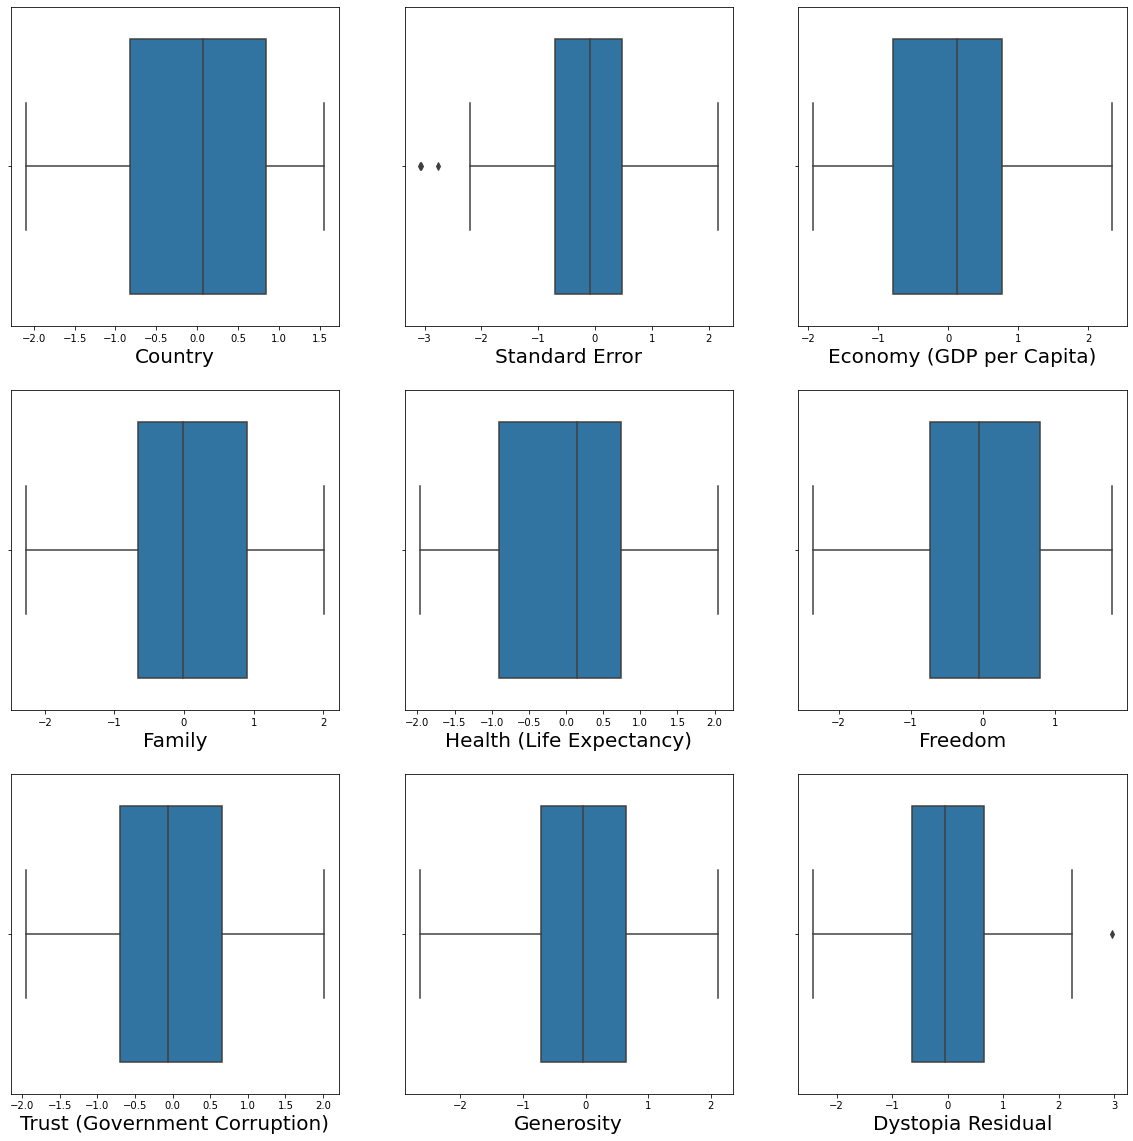

In [44]:
plt.figure(figsize=(20,20))
plotnumber=1

for column in x:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(x[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [45]:
(np.abs(zscore(x))<3).all()

False

In [46]:
x.shape

(153, 9)

In [47]:
z_score=zscore(df1[['Standard Error','Dystopia Residual']])
abs_z_score=np.abs(z_score)
filtering_entry=(abs_z_score<3).all(axis=1)
df2=df1[filtering_entry]


In [48]:
df2.shape

(150, 10)

In [49]:
x=df2.drop(columns=['Happiness Score'],axis=1)
y=df2['Happiness Score']

In [50]:
x.shape,y.shape

((150, 9), (150,))

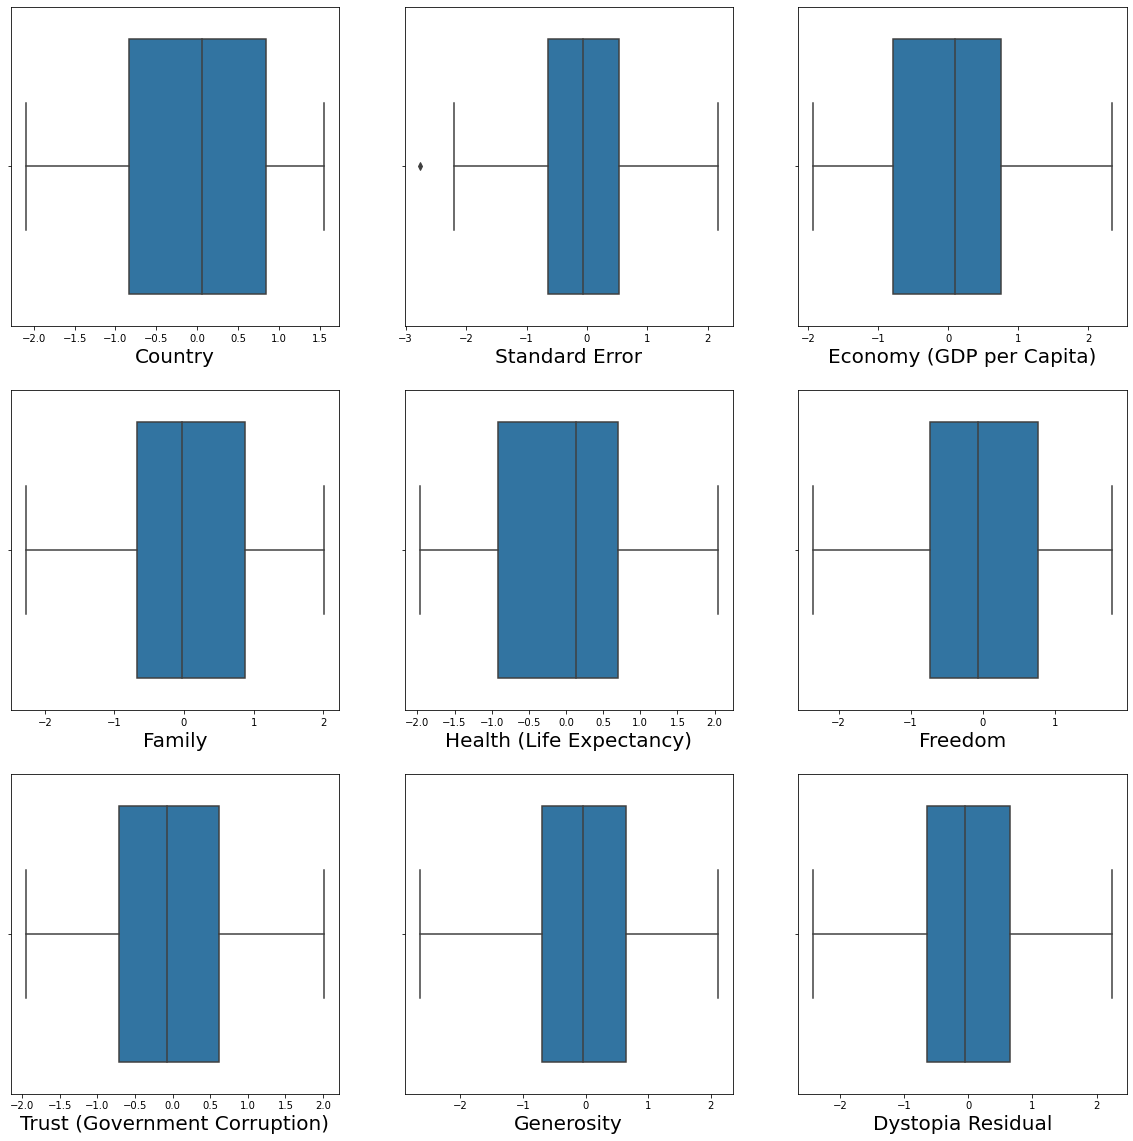

In [51]:
plt.figure(figsize=(20,20))
plotnumber=1

for column in x:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(x[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [54]:
(np.abs(zscore(x))<3).all()

False

In [55]:
z_score=zscore(df2[['Standard Error']])
abs_z_score=np.abs(z_score)
filtering_entry=(abs_z_score<3).all(axis=1)
df3=df2[filtering_entry]


In [56]:
x=df3.drop(columns=['Happiness Score'],axis=1)
y=df3['Happiness Score']

In [57]:
x.shape,y.shape

((149, 9), (149,))

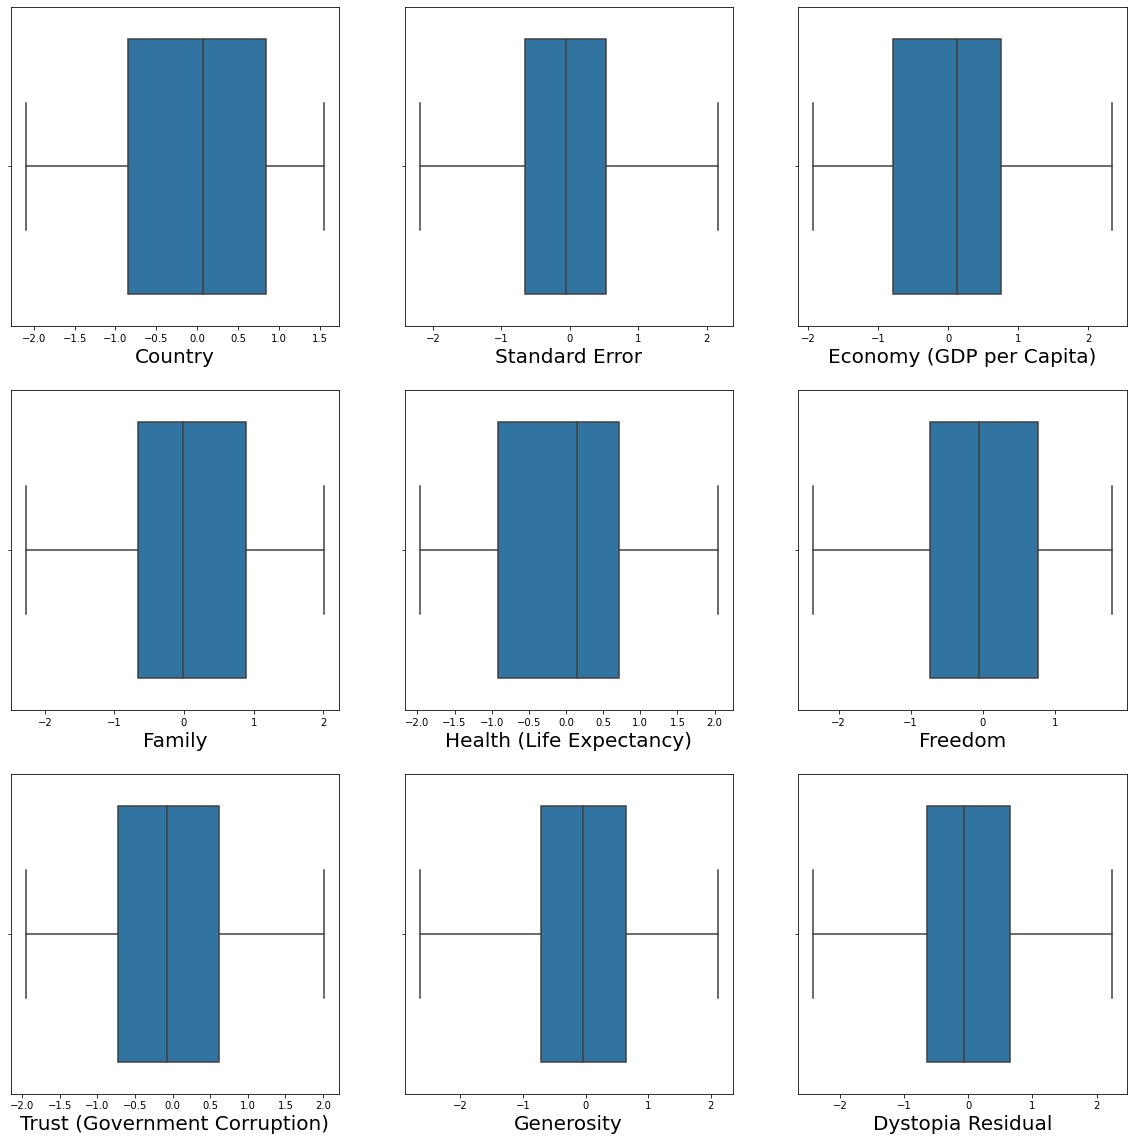

In [58]:
plt.figure(figsize=(20,20))
plotnumber=1

for column in x:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(x[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [59]:
(np.abs(zscore(x)<3)).all()

True

In [60]:
x.shape,y.shape

((149, 9), (149,))

In [61]:
#outliers are within <3 deviation.now model has no outlier,no skewness hence model is ready for training and testing 

In [62]:
x_scaled=scaler.fit_transform(x)

In [63]:
x.shape

(149, 9)

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=441)

In [66]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((111, 9), (111,), (38, 9), (38,))

In [67]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [68]:
lr=LinearRegression()
svr=SVR()
dt=DecisionTreeRegressor()
knn=KNeighborsRegressor()
rfc=RandomForestRegressor()

In [69]:
lr.fit(x_train,y_train)

LinearRegression()

In [70]:
lr.score(x_train,y_train)   

0.9902685127028117

In [71]:
lr.score(x_test,y_test)

0.9827219772029709

In [77]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [73]:
y_pred_lr=lr.predict(x_test)

In [74]:
# comparing actual values with predicted values

actual_vs_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lr})
actual_vs_pred 

,Actual,Predicted
143,-1.369459,-1.321934
97,-0.401631,-0.413477
58,0.410094,0.343083
12,1.551512,1.633927
14,1.486903,1.593475
109,-0.581642,-0.612803
131,-0.964641,-0.888903
16,1.348116,1.417741
95,-0.344214,-0.433190
118,-0.735412,-0.894643


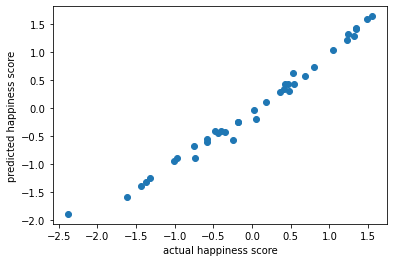

In [75]:
plt.scatter(y_test,y_pred_lr)
plt.xlabel('actual happiness score')
plt.ylabel('predicted happiness score')
plt.show()

In [78]:
r2 = r2_score(y_test, y_pred_lr)
r2

0.9827219772029709

In [79]:
print('Mean absolute error :',(metrics.mean_absolute_error(y_test,y_pred_lr)))
print('Mean squared error :',(metrics.mean_squared_error(y_test,y_pred_lr)))
print('Root mean squared error :',(np.sqrt(mean_squared_error(y_test,y_pred_lr))))
print('R2 value is :',(r2_score(y_test,y_pred_lr)))

Mean absolute error : 0.08833948569986264
Mean squared error : 0.0160286017295137
Root mean squared error : 0.12660411418873282
R2 value is : 0.9827219772029709


In [80]:
import statsmodels.formula.api as smf

In [81]:
lr=smf.ols(formula='y ~x',data=x).fit()

In [83]:
lr.conf_int()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     1348.
Date:                Sun, 02 Jan 2022   Prob (F-statistic):          1.52e-130
Time:                        08:09:47   Log-Likelihood:                 124.25
No. Observations:                 149   AIC:                            -228.5
Df Residuals:                     139   BIC:                            -198.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0006      0.009      0.069      0.945      -0.017       0.018
x[0]           0.0195      0.009      2.171      0.032       0.002       0.037
x[1]          -0.0011      0.011     -0.103      0.918      -0.023       0.020
x[2]           0.3591      0.019     18.892      0.000       0.322       0.397
x[3]           0.2372      0.013     17.712      0.000       0.211       0.264
x[4]           0.2283      0.017     13.115      0.000       0.194       0.263
x[5]           0.1157      0.013      9.053      0.000       0.090       0.141
x[6]           0.0673      0.011      6.258      0.000       0.046       0.089
x[7]           0.0850      0.011      7.982      0.000       0.064       0.106
x[8]           0.4614      0.010     48.520      0.000       0.443       0.480
==============================================================================
Omnibus:                       50.864   Durbin-Watson:                   1.126
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              179.928
Skew:                          -1.244   Prob(JB):                     8.49e-40
Kurtosis:                       7.774   Cond. No.                         4.87
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
dt=DecisionTreeRegressor()
knn=KNeighborsRegressor()
rfc=RandomForestRegressor()

In [85]:
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [86]:
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [87]:
rfc.fit(x_train,y_train)

RandomForestRegressor()

In [88]:
svr.fit(x_train,y_train)

SVR()

In [89]:
svr.score(x_test,y_test)

0.903002439581583

In [90]:
knn.score(x_test,y_test)

0.8580109455862561

In [91]:
rfc.score(x_test,y_test)

0.8231985967353097

In [92]:
dt.score(x_test,y_test)

0.5806120927633664

In [93]:
y_predict=dt.predict(x_test)

In [94]:
print('MAE:', metrics.mean_absolute_error(y_test,y_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_predict)))

MAE: 0.4739899597808062
MSE: 0.38906082103480655
RMSE: 0.6237474016256954


In [95]:
#Hypertuning - GridSearchCV

In [96]:
from sklearn.model_selection import GridSearchCV

In [97]:
grid_param={"splitter":["best","random"],
            "max_depth" : [1,3,5,7],
           "min_samples_leaf":[1,2,3,4,5,6,7],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40] }

In [98]:
grid_search=GridSearchCV(dt,param_grid=grid_param,cv=3,verbose=3)

In [99]:
grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 5600 candidates, totalling 16800 fits
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=1, ma

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 3, 5, 7],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': [None, 10, 20, 30, 40],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                         'min_weight_fraction_leaf': [0.1, 0.2, 0.3, 0.4, 0.5],
                         'splitter': ['best', 'random']},
             verbose=3)

In [100]:
best_parameters=grid_search.best_params_

In [101]:
best_parameters

{'max_depth': 7,
 'max_features': 'sqrt',
 'max_leaf_nodes': 40,
 'min_samples_leaf': 4,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [141]:
clf=DecisionTreeRegressor(max_depth=7,max_features='sqrt',
                          max_leaf_nodes=10,
                          min_samples_leaf=4,
                          min_weight_fraction_leaf=0.1,splitter='best')

In [142]:
clf.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=7, max_features='sqrt', max_leaf_nodes=10,
                      min_samples_leaf=4, min_weight_fraction_leaf=0.1)

In [143]:
y_pred_dt=clf.predict(x_test)

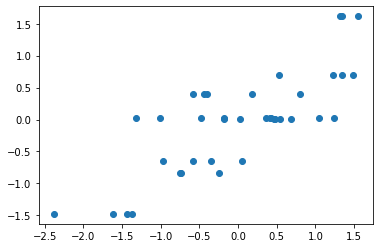

In [144]:
plt.scatter(y_test,y_pred_dt)

In [145]:
#with tunning

In [146]:
print('MAE:', metrics.mean_absolute_error(y_test,y_pred_dt))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_dt))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred_dt)))

MAE: 0.47742086322749605
MSE: 0.3484482465123134
RMSE: 0.5902950503877814


In [108]:
# without tunning

In [109]:
print('MAE:', metrics.mean_absolute_error(y_test,y_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_predict)))

MAE: 0.4739899597808062
MSE: 0.38906082103480655
RMSE: 0.6237474016256954
